In [2]:
import os
import sys
import matplotlib.pyplot as plt
sys.path.append("../")
sys.path.append("../predict")

from predict.crop_frames import get_local_crops
from predict.create_dino_features import video_to_embeddings
from predict.predict_dino import create_dino_model

Using device: cuda


In [4]:
clip_folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL_v2/data/train/clips_cropped"

face_checkpoint = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/checkpoints/dino/face/teacher_checkpoint.pth"
hand_checkpoint = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/checkpoints/dino/hand/teacher_checkpoint.pth"

num_frames = 10

clip_names = os.listdir(clip_folder)
clip_names = [file for file in clip_names if file.endswith(".mp4")]

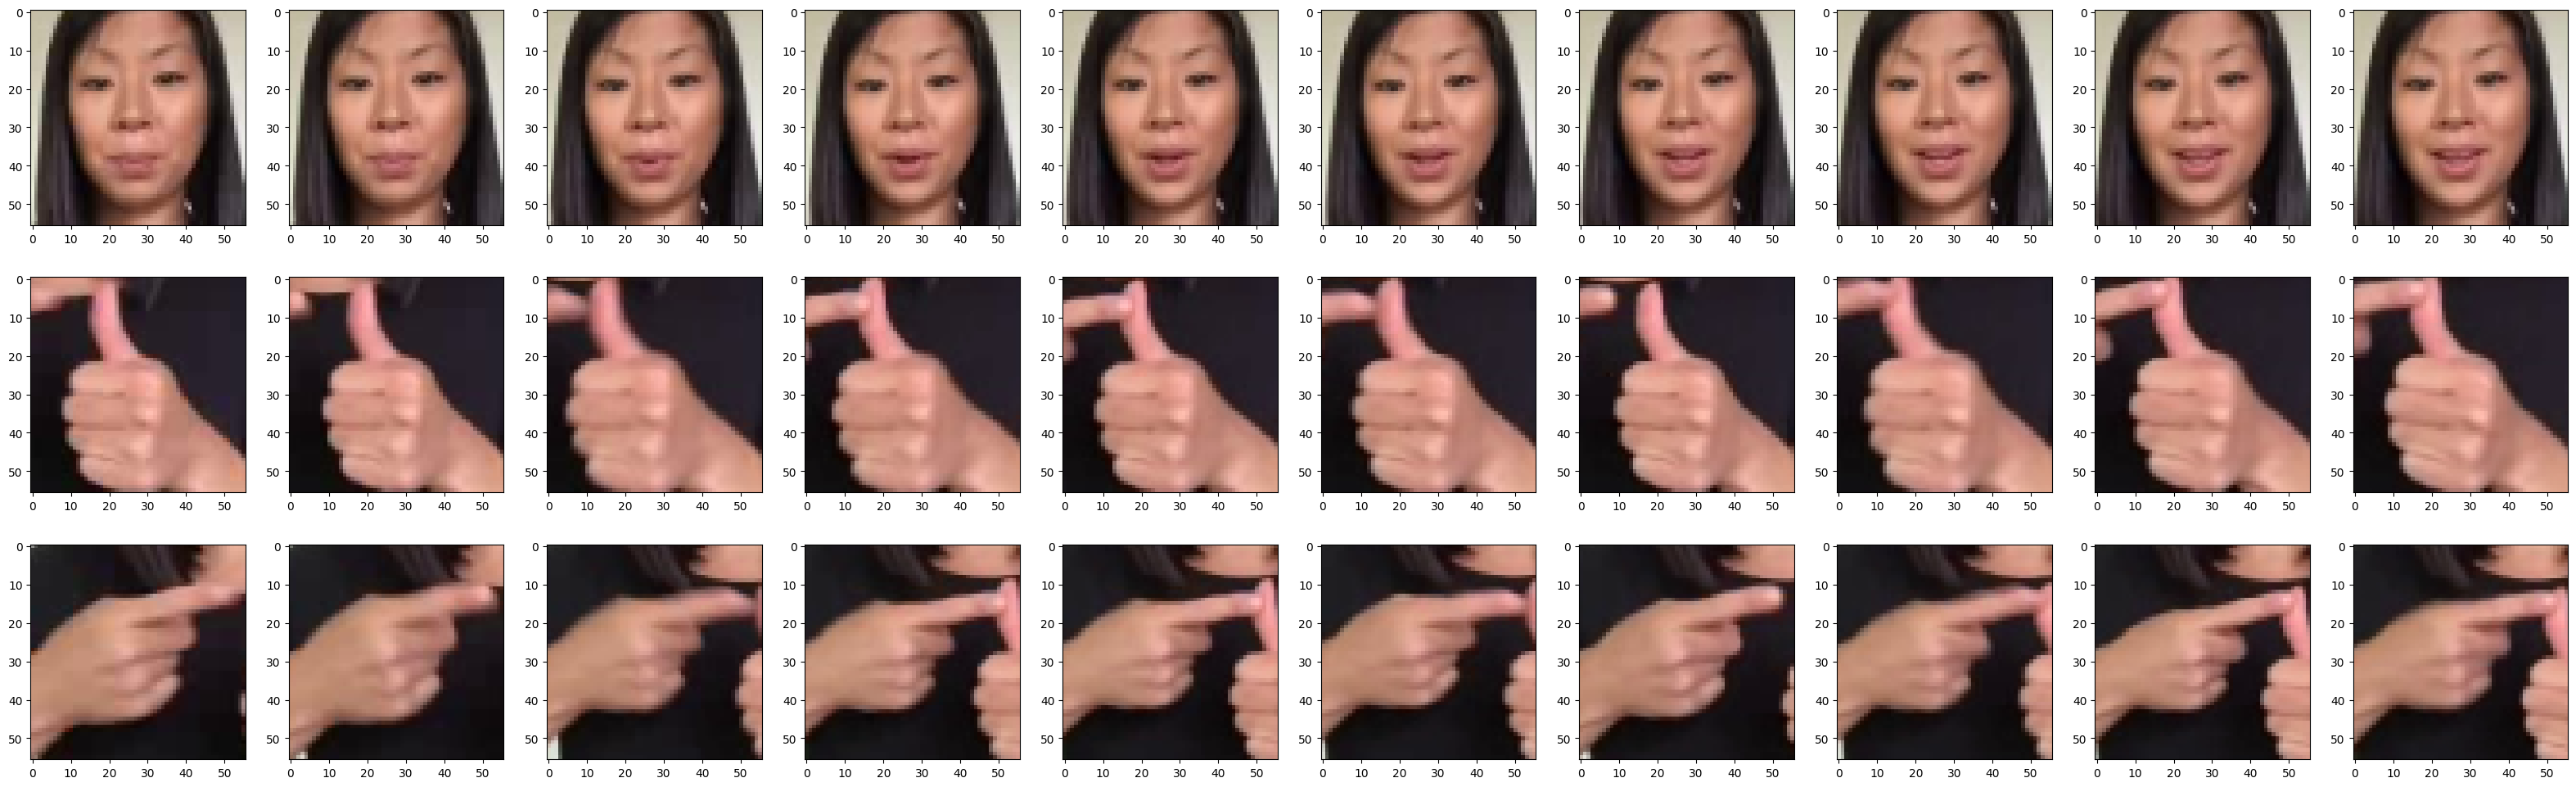

In [5]:
# crop face and hands

clip_name = clip_names[0]
clip_name = clip_name.replace(".mp4", "")
clip_path = os.path.join(clip_folder, clip_name)

face, hand_left, hand_right = get_local_crops(clip_path)

fig, ax = plt.subplots(3, num_frames, figsize=(num_frames*4, 3*4))
for fidx in range(num_frames):
    ax[0, fidx].imshow(face[fidx])
    ax[1, fidx].imshow(hand_left[fidx])
    ax[2, fidx].imshow(hand_right[fidx])
plt.show()

In [ ]:
# initialize models

face_model = create_dino_model(face_checkpoint)
hand_model = create_dino_model(hand_checkpoint)
face_model = face_model.cuda().eval()
hand_model = hand_model.cuda().eval()

In [7]:
# extract features

face_features = video_to_embeddings(face, face_model, batch_size=32)
left_features = video_to_embeddings(hand_left, hand_model, batch_size=32)
right_features = video_to_embeddings(hand_right, hand_model, batch_size=32)

print("face_features", face_features.shape)
print("left_features", left_features.shape)
print("right_features", right_features.shape)

face_features (260, 384)
left_features (260, 384)
right_features (260, 384)
